In [84]:
import pandas as pd
import numpy as np
from ggplot import *
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [24]:
data_url = "../galton-data.csv"
#print(data_url)
galton_data = pd.read_csv(data_url,encoding = "ISO-8859-1")
#galton_data.head()
data_url = '../AnnualSpending.csv'
spend_data = pd.read_csv(data_url)
#spend_data.head()
data_url = '../data.worldbank.org.csv'
world_bank_data = pd.read_csv(data_url,encoding = "ISO-8859-1")
world_bank_data = world_bank_data.replace({"..":np.nan,"?":np.nan})
#world_bank_data.head()
#galton_data.head()

In [25]:
galton_height_gender_cols = galton_data[["height","gender"]]
galton_height_gender_cols.head()

,height,gender
0,73.2,M
1,69.2,F
2,69.0,F
3,69.0,F
4,73.5,M


In [26]:
world_bank_data.head()
print("Total number of rows which have NAN value: ",world_bank_data.shape[0]-world_bank_data.dropna().shape[0])
world_bank_data = world_bank_data[["Country","Life.expectancy","Infant.mortality","Per.capita.income","Literacy"]]
world_bank_data = world_bank_data.dropna()
world_bank_country = world_bank_data[["Country"]]
world_bank_data = world_bank_data.drop('Country',axis=1)
world_bank_data.head()
print(world_bank_data.shape[0])

Total number of rows which have NAN value:  172
45


In [74]:
ggplot(galton_height_gender_cols,aes(x='height', color='gender')) + geom_density(alpha = 1) + xlab("Height")
k = 2
galton_2k_cluster = KMeans(n_clusters=k,random_state=0).fit(galton_height_gender_cols.loc[:,["height"]])
cluster_label = galton_2k_cluster.predict(galton_height_gender_cols.loc[:,["height"]])
label = galton_2k_cluster.labels_
centers = galton_2k_cluster.cluster_centers_
print("Cluster Means: ", "\n", centers, "\n", "Clustering Vector: ","\n", label)

Cluster Means:  
 [[69.78419865]
 [63.81692308]] 
 Clustering Vector:  
 (898,)


C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


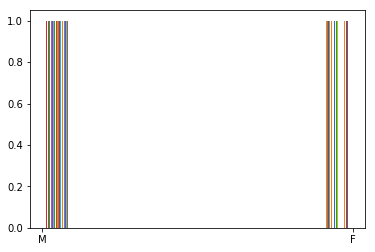

In [103]:
#cm = confusion_matrix(galton_height_gender_cols["gender"],label)
#cm = pd.Series(label)
#cm = cm.value_counts()
galton_height_gender_cols['label']=label
cm_temp = pd.crosstab(galton_height_gender_cols['gender'],galton_height_gender_cols['label'])
plt.hist(x=galton_height_gender_cols['gender'])#,galton_height_gender_cols['label'])
#print(cm_temp)
plt.show()
#print(galton_height_gender_cols["gender"].shape,label.shape)

In [127]:
world_bank_data.head()
k = 2
world_bank_2k_cluster = KMeans(n_clusters=k).fit(world_bank_data)
k2_mean = world_bank_2k_cluster.cluster_centers_
k2_label = world_bank_2k_cluster.labels_
k = 3
world_bank_3k_cluster = KMeans(n_clusters=k).fit(world_bank_data)
k3_mean = world_bank_3k_cluster.cluster_centers_
k3_label = world_bank_3k_cluster.labels_
print(np.asarray(k2_mean,dtype=np.float))
print(np.asarray(k3_mean,dtype=np.float))

[[7.09230754e+01 2.50813953e+01 8.16167119e+03 8.78985214e+01]
 [8.06215732e+01 4.45000000e+00 6.37779709e+04 9.70090000e+01]]
[[8.06215732e+01 4.45000000e+00 6.37779709e+04 9.70090000e+01]
 [6.91127202e+01 2.98205882e+01 4.61503980e+03 8.52681391e+01]
 [7.77621951e+01 7.17777778e+00 2.15600564e+04 9.78355211e+01]]
